# Import Libraries

In [1]:
pip install import-ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb


# Import Dataset

importing Jupyter notebook from data_analysation.ipynb
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Colum

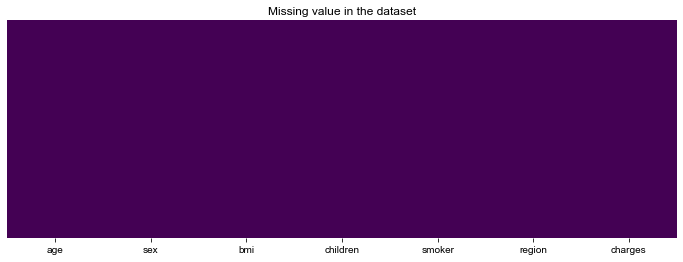

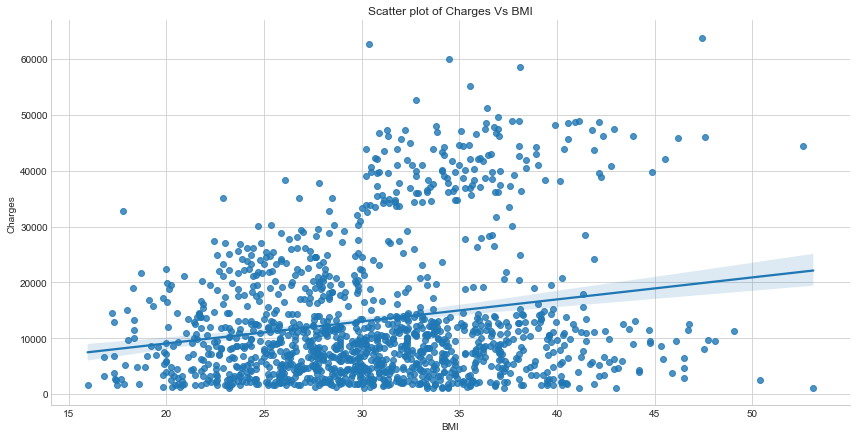

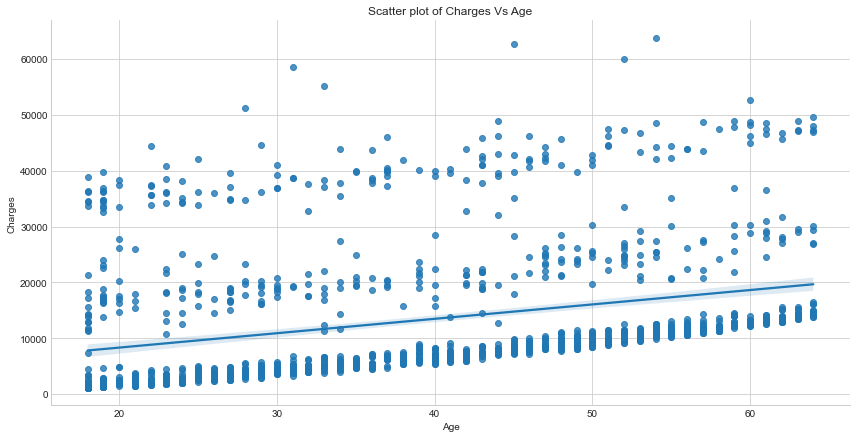

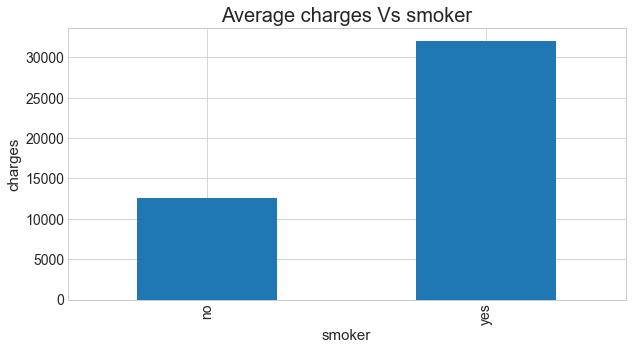

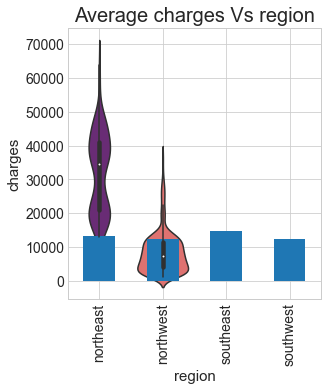

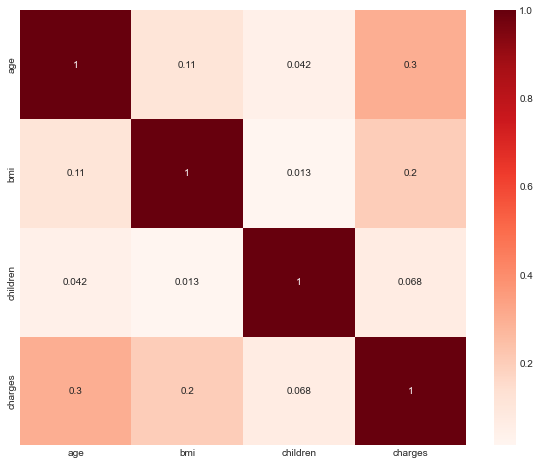

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [3]:
import data_analysation

# Define x and y

In [4]:
df = data_analysation.dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing Dataset

In [5]:
#Creating dummy variables for the catergorical variable sex
df['Gender']=np.where(df['sex']=='female',1,0)

#Drop original column of sex
df.drop(columns=['sex'],axis=1,inplace=True)

In [6]:
#Creating dummy variables for the catergorical variable smoke
df['Smoker']=np.where(df['smoker']=='yes',1,0)

#Drop original column of smoke
df.drop(columns=['smoker'],axis=1,inplace=True)

In [7]:
df.head()

,age,bmi,children,region,charges,Gender,Smoker
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0


In [8]:
#Create dummy variables for the categorical varable region
df['Northeast'] = np.where(df['region']=='northeast',1,0)
df['Northwest'] = np.where(df['region']=='northwest',1,0)
df['Southeast'] = np.where(df['region']=='southeast',1,0)
df['Southwest'] = np.where(df['region']=='southwest',1,0)

#Drop original column of region
df.drop(columns=['region'],axis=1,inplace=True)

In [9]:
df.head()

,age,bmi,children,charges,Gender,Smoker,Northeast,Northwest,Southeast,Southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [10]:
print(df)

      age     bmi  children      charges  Gender  Smoker  Northeast  \
0      19  27.900         0  16884.92400       1       1          0   
1      18  33.770         1   1725.55230       0       0          0   
2      28  33.000         3   4449.46200       0       0          0   
3      33  22.705         0  21984.47061       0       0          0   
4      32  28.880         0   3866.85520       0       0          0   
...   ...     ...       ...          ...     ...     ...        ...   
1333   50  30.970         3  10600.54830       0       0          0   
1334   18  31.920         0   2205.98080       1       0          1   
1335   18  36.850         0   1629.83350       1       0          0   
1336   21  25.800         0   2007.94500       1       0          0   
1337   61  29.070         0  29141.36030       1       1          0   

      Northwest  Southeast  Southwest  
0             0          0          1  
1             0          1          0  
2             0          1 

In [11]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df['charges'],alpha=0.05)

ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [12]:
## Log transform
df['charges'] = np.log(df['charges'])

In [13]:
print(df)

      age     bmi  children    charges  Gender  Smoker  Northeast  Northwest  \
0      19  27.900         0   9.734176       1       1          0          0   
1      18  33.770         1   7.453302       0       0          0          0   
2      28  33.000         3   8.400538       0       0          0          0   
3      33  22.705         0   9.998092       0       0          0          1   
4      32  28.880         0   8.260197       0       0          0          1   
...   ...     ...       ...        ...     ...     ...        ...        ...   
1333   50  30.970         3   9.268661       0       0          0          1   
1334   18  31.920         0   7.698927       1       0          1          0   
1335   18  36.850         0   7.396233       1       0          0          0   
1336   21  25.800         0   7.604867       1       0          0          0   
1337   61  29.070         0  10.279914       1       1          0          1   

      Southeast  Southwest  
0         

In [14]:
dependent_variable ='charges'

In [15]:
#Creating a list of Independent Variables
independent_variables = df.columns.tolist()

In [16]:
independent_variables.remove(dependent_variable)

In [17]:
independent_variables

['age',
 'bmi',
 'children',
 'Gender',
 'Smoker',
 'Northeast',
 'Northwest',
 'Southeast',
 'Southwest']